


# PROJECT : CREDIT CARD FRAUD DETECTION

The data is obtained from https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
# Import all the necessary modules

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Count the occurrences of fraud and no fraud and print them

occ = df['Class'].value_counts()

print(occ)

0    284315
1       492
Name: Class, dtype: int64


In [3]:
# Print the ratio of fraud cases
ratio_cases = occ/len(df.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.001727485630620034
Ratio of non-fraudulent cases: 0.9982725143693799


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

"""
Convert the DataFrame into two variables
X: data columns (V1 - V28)
y: lable column
"""
X = df.iloc[:, 1:29].values
y = df.Class.values

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 0)


In [5]:
# Fit a logistic regression model to our data
model = LogisticRegression()

model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

In [6]:
# Print the classifcation report and confusion matrix

print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)

print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.95      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85285    11]
 [   56    91]]


### Logistic regression combined with SMOTE
#### Now we're going to take the Logistic Regression model and combine that with a SMOTE resampling method. We will do that using a pipeline that combines the resampling method with the model. First, we will define the pipeline that we're going to use.

In [7]:
# Create the pipeline
from imblearn.pipeline import Pipeline

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE()
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

X = df.iloc[:, 1:29].values
y = df.Class.values


#### Now we can use the pipeline we constrcuted above. This method is aka combining a logistic regression with a SMOTE method. Now we will run it on the data. You can treat the pipeline as if it were a single machine learning model. Our data X and y are already defined, and the pipeline is defined too.¶

In [8]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train)
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 

print('Classification report:\n', classification_report(y_test, predicted))
con_mat= confusion_matrix(y_true=y_test, y_pred=predicted)

print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[85285    11]
 [   56    91]]


SMOTE method did not make any difference inthe performance of the model.

# Model adjustments
A simple way to adjust the random forest model to deal with highly imbalanced fraud data, is to use the class_weights option when defining your sklearn model

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
"""
Convert the DataFrame into two variables
X: data columns (V1 - V28)
y: lable column
"""
X = df.iloc[:, 1:29].values
y = df.Class.values

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 0)


In [4]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight = 'balanced_subsample', random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs= model.predict_proba(X_test)

# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Print the roc_auc_score, the classification report and confusion matrix

print(roc_auc_score(y_test, probs[:,1]))

print(classification_report(y_test, predicted))

print(confusion_matrix(y_test, predicted))

0.9407653396192468
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.97      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85292     4]
 [   36   111]]


As we can see in the metrics scores when we used the class_weights option when defining oour sklearn model, the performcance of the model is much better. Now the false positives are only 4 rather than 11 and the false negatives are 36 rather than 56. Using the class weights with our Random Forest Model definetely helped improve our model.

Now to see whether I can improve the model even better I'll define weights manually, to be able to off-set that imbalance slightly. 

In this case we have 492 fraud to 284315 non-fraud cases, so by setting the weight ratio to 1:12, we get to a 1/3 fraud to 2/3 non-fraud ratio, which is good enough for training the model on.

In [5]:
"""
Convert the DataFrame into two variables
X: data columns (V1 - V28)
y: lable column
"""
X = df.iloc[:, 1:29].values
y = df.Class.values

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 0)


In [6]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


def get_model_results(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  probs = model.predict_proba(X_test)
  print (classification_report(y_test, predicted))
  print (confusion_matrix(y_test, predicted))


# Change the model options
model = RandomForestClassifier(bootstrap=True, class_weight={0:1, 1:12}, criterion='entropy', max_depth=10, min_samples_leaf=10, n_estimators=20, n_jobs=-1, random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.91      0.82      0.86       147

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443

[[85284    12]
 [   27   120]]


In this model we have 8 more false positves while the false negatives reduced from 36 to 27. The recall metrics is better in this model than the previos one increasing from 0.76 to .82.

## GridSearchCV to find optimal parameters
Now I am going to use GridSearchCV to define which performance metric to score the options on. Since for fraud detection I am mostly interested in catching as many fraud cases as possible, I will optimize the model settings to get the best possible Recall score.

In [7]:
from sklearn.model_selection import GridSearchCV

# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'], 'max_depth': [4, 8], 'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

I will pass the settings above onto the previous model and see what the improvement will be, if any.

In [8]:
def get_model_results(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  probs = model.predict_proba(X_test)
  print (classification_report(y_test, predicted))
  print (confusion_matrix(y_test, predicted))


# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, criterion='gini',
            max_depth=8, max_features='log2', min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.82      0.81      0.82       147

    accuracy                           1.00     85443
   macro avg       0.91      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85270    26]
 [   28   119]]


There is no improvement in the model. Indeed the previous model is much better than this.

## Ensemble methods¶
Now I'll try ensemble method and see how it will work for fraud detection.I'll combine Random Forest model, with the Logistic Regression and Decision Tree. 

In [10]:
 # Import the packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2', min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")



def get_model_results(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  print (classification_report(y_test, predicted))
  print (confusion_matrix(y_test, predicted))


# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')



# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.85      0.82      0.83       147

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85275    21]
 [   27   120]]


This model is better than the GridSearchCV method but it is not better than the model where I used the class weihgts. 

#Now I will try #adjusting the weights within the voting classifier to see how the model will perform.


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

"""
Convert the DataFrame into two variables
X: data columns (V1 - V28)
y: lable column
"""
X = df.iloc[:, 1:29].values
y = df.Class.values

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 0)

In [12]:
# Import the packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2', min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")


def get_model_results(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  print (classification_report(y_test, predicted))
  print (confusion_matrix(y_test, predicted))
    
    
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='soft', weights=[1, 4, 1], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.84      0.81      0.83       147

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85274    22]
 [   28   119]]





Not much improvement form the ensemble method. Below are the comparison of all models:




## Logistic Regression:
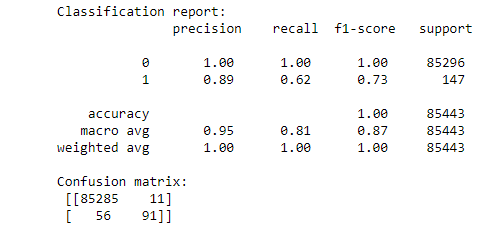


## Logistic Regression with SMOTE:
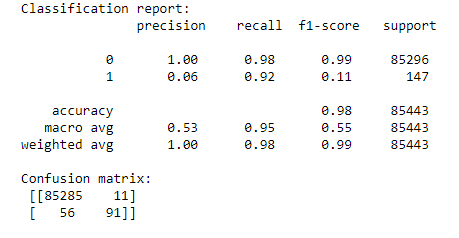


## Balanced subsample:
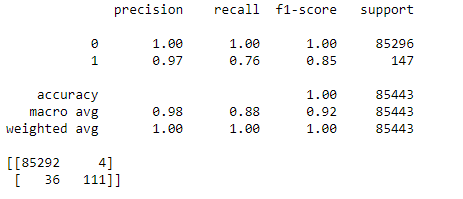


## Class Weight:

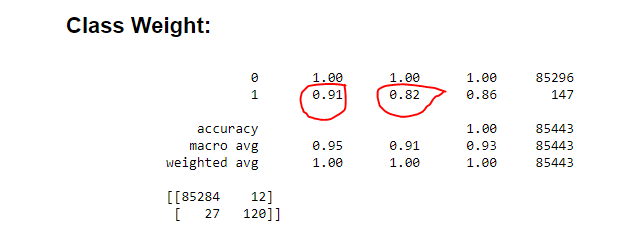


## GridSearchCV:
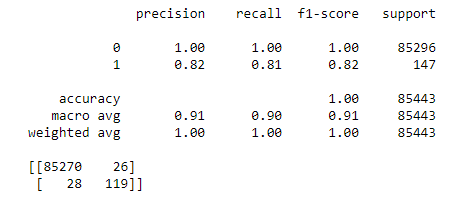


## Ensemble:
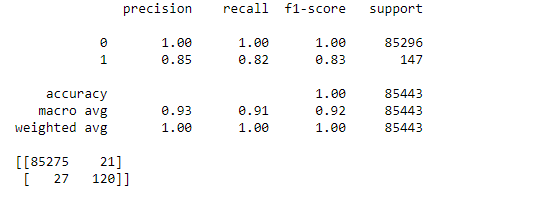


## Ensemble with weights:
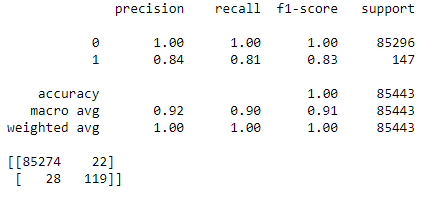




# CONCLUSION: 

Given the precision-recall trade-off the best model seems to be the one I used the class weights.